# UNB - PPGI
## Processamento de Imagem

### Trabalho 02

<br>

Henrique Brandão
___

Escolha duas imagens coloridas , entre 500 e 700 pixels de largura ou altura. As dimensões da imagem tem que ser bem documentadas.

Represente cada imagem utilizando uma palheta de 256 cores e outra de 16 cores
 
Quantize as cores utilizando algoritmo LBG (parecido com K-means) para quantizar as 16M cores da imagem em 16 ou 256 core  
Repita a representação de cada imagem quantizada desta vutilizandocdifusão de erro.

  
Entrega é um documento em PDF em formato de relatório. Código só em sessão de anexo/apêndice. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultaos. 

In [1]:
import cv2

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
f1, f2 = 'img01.jpg', 'img02.jpg'
i1, i2 = Image.open(f1), Image.open(f2)

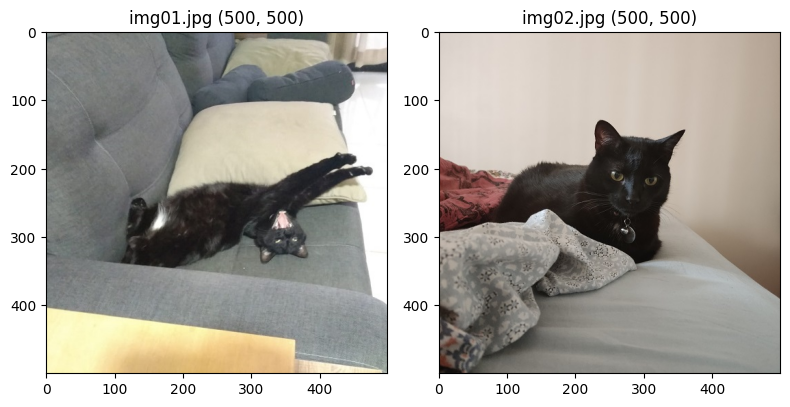

In [3]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.title(f'{f1} {i1.size}')
plt.imshow(i1)

plt.subplot(1, 2, 2)
plt.title(f'{f2} {i2.size}')
plt.imshow(i2)

plt.tight_layout()
plt.show()

## K-Means

> https://github.com/htbrandao/pos-grad-iesb-ia/blob/master/courses/unsupervised-ml/trab-covid-19.ipynb

> https://medium.com/towardssingularity/k-means-clustering-for-image-segmentation-using-opencv-in-python-17178ce3d6f3

In [4]:
k1, k2 = 256, 16

In [5]:
def prepara_imagem(fp):
    img = cv2.imread(fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = img.reshape((-1,3))
    return img, np.float32(pixels)

In [6]:
def segmentacao_imagem(fp: str, paleta):
    img, pixels = prepara_imagem(fp)
    params = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    retval, labels, centers = cv2.kmeans(pixels, paleta, None, params, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((img.shape))
    return img, segmented_image

## Ex 1

In [7]:
%%time

i1, seg1a = segmentacao_imagem(f1, k1)
_, seg1b = segmentacao_imagem(f1, k2)

CPU times: user 4min 25s, sys: 2.21 s, total: 4min 27s
Wall time: 25.5 s


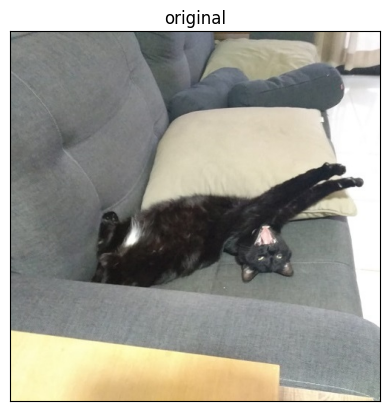

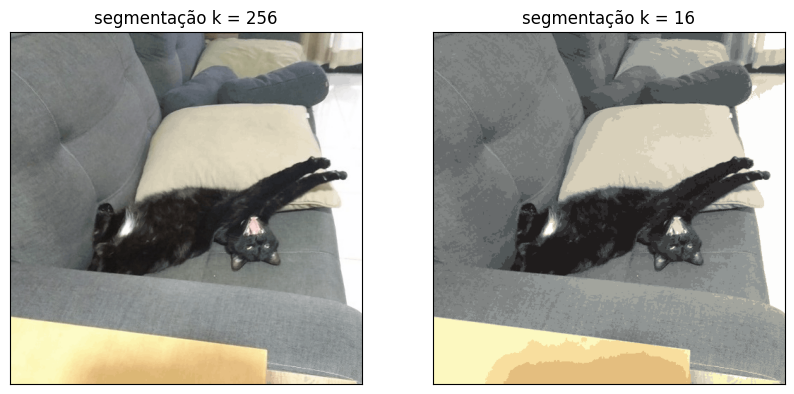

In [8]:
plt.title('original')
plt.imshow(i1)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.title(f'segmentação k = {k1}')
plt.imshow(seg1a)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.title(f'segmentação k = {k2}')
plt.imshow(seg1b)
plt.xticks([])
plt.yticks([])

plt.show()

## Ex 2

In [9]:
%%time

i2, seg2a = segmentacao_imagem(f2, k1)
_, seg2b = segmentacao_imagem(f2, k2)

CPU times: user 4min 29s, sys: 1.77 s, total: 4min 31s
Wall time: 25.5 s


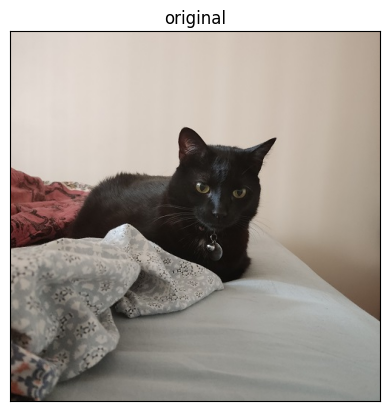

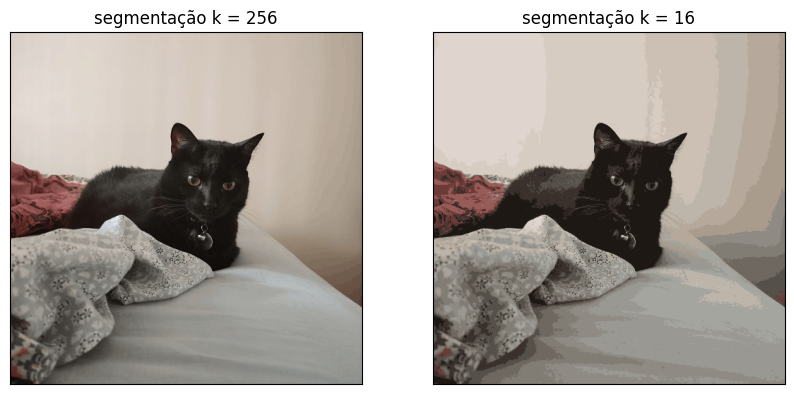

In [10]:
plt.title('original')
plt.imshow(i2)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.title(f'segmentação k = {k1}')
plt.imshow(seg2a)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.title(f'segmentação k = {k2}')
plt.imshow(seg2b)
plt.xticks([])
plt.yticks([])

plt.show()

___
## Dithering

In [11]:
# def dithering(pixels, niveis_quantizacao: int):
#     r, g, b = cv2.split(pixels)

#     def apply_dithering(channel, quant):
#         h, w = channel.shape
#         for y in range(h):
#             for x in range(w):
#                 old_pixel = channel[y, x]
#                 new_pixel = np.uint8(np.floor(old_pixel / 255.0 * quant) * (255.0 / quant))
#                 error = old_pixel - new_pixel
#                 channel[y, x] = new_pixel
#                 if x < w - 1:
#                     channel[y, x + 1] += error * 7 / 16
#                 if x > 0 and y < h - 1:
#                     channel[y + 1, x - 1] += error * 3 / 16
#                 if y < h - 1:
#                     channel[y + 1, x] += error * 5 / 16
#                 if x < w - 1 and y < h - 1:
#                     channel[y + 1, x + 1] += error * 1 / 16
#         return channel

#     canal_vermelho_dithered = apply_dithering(r, niveis_quantizacao)
#     canal_verde_dithered = apply_dithering(g, niveis_quantizacao)
#     canal_azul_dithered = apply_dithering(b, niveis_quantizacao)

#     imagem_dithered = cv2.merge((canal_vermelho_dithered, canal_verde_dithered, canal_azul_dithered))

#     return imagem_dithered

def dithering(pixels):
    return Image.fromarray(pixels).convert("P", dither=Image.Dither.FLOYDSTEINBERG)

In [12]:
%%time

seg1ad = dithering(seg1a)
seg1bd = dithering(seg1b)

CPU times: user 6.73 ms, sys: 0 ns, total: 6.73 ms
Wall time: 6.43 ms


In [13]:
%%time

seg2ad = dithering(seg2a)
seg2bd = dithering(seg2b)

CPU times: user 7.72 ms, sys: 0 ns, total: 7.72 ms
Wall time: 6.89 ms


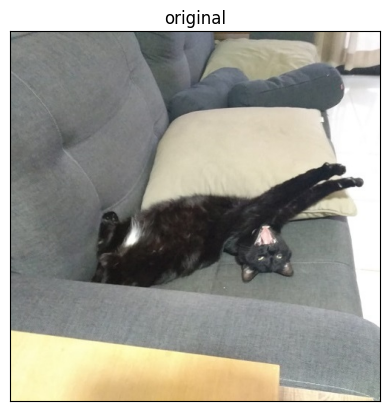

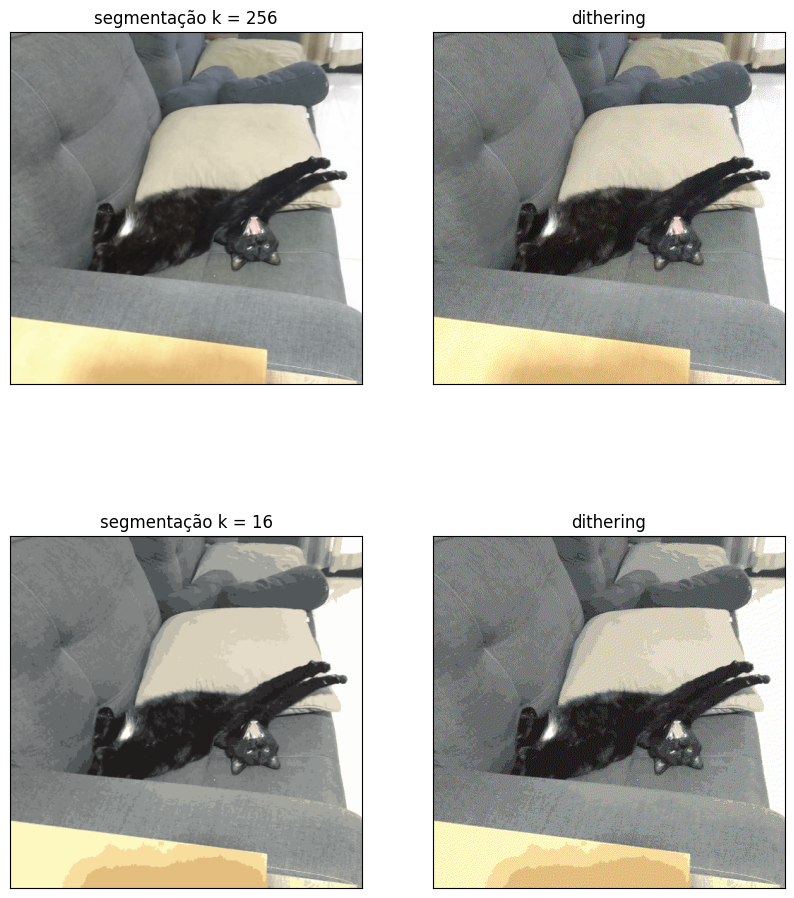

In [14]:
plt.title('original')
plt.imshow(i1)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.title(f'segmentação k = {k1}')
plt.imshow(seg1a)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title(f'dithering')
plt.imshow(seg1ad)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title(f'segmentação k = {k2}')
plt.imshow(seg1b)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title(f'dithering')
plt.imshow(seg1bd)
plt.xticks([])
plt.yticks([])

plt.show()

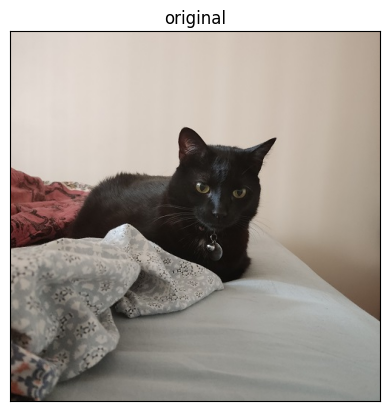

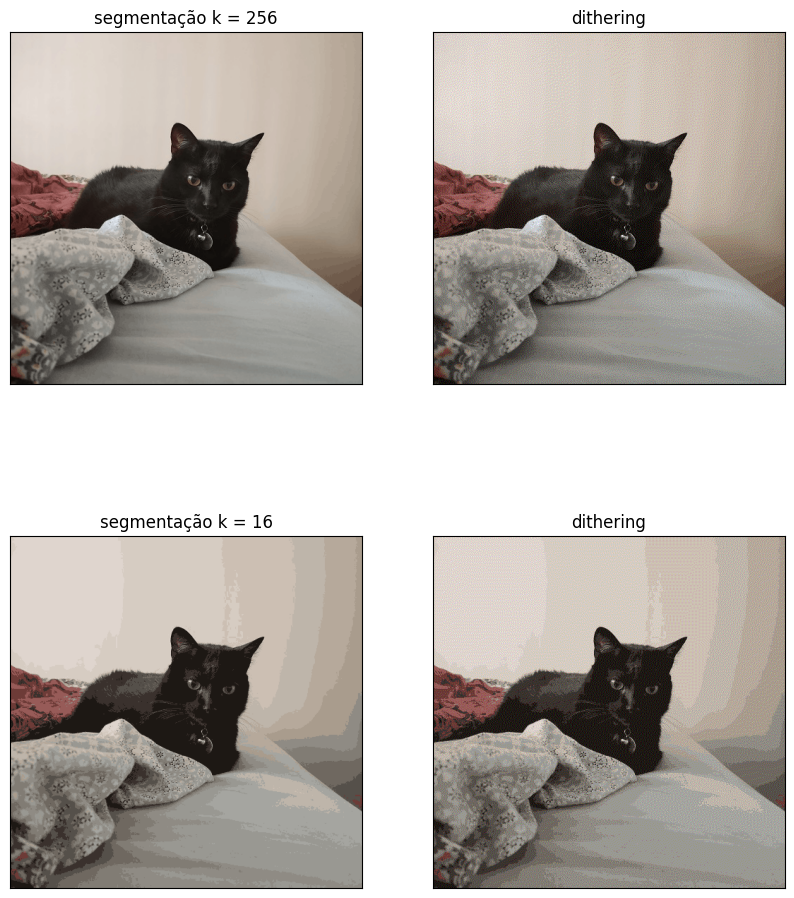

In [15]:
plt.title('original')
plt.imshow(i2)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.title(f'segmentação k = {k1}')
plt.imshow(seg2a)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title(f'dithering')
plt.imshow(seg2ad)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title(f'segmentação k = {k2}')
plt.imshow(seg2b)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title(f'dithering')
plt.imshow(seg2bd)
plt.xticks([])
plt.yticks([])

plt.show()

___

# Exportar resultados

In [16]:
def salvar_imagem(vec, fp, dir_saida: str = './saida'):
    Image.fromarray(vec).save(f'{dir_saida}/{fp}.png')

In [17]:
salvar_imagem(seg1a, 'img01-seg-256')
salvar_imagem(seg1b, 'img01-seg-16')

seg1ad.save('./saida/img01-seg-256-dither.png')
seg1bd.save('./saida/img01-seg-16-dither.png')

salvar_imagem(seg2a, 'img02-seg-256')
salvar_imagem(seg2b, 'img02-seg-16')

seg2ad.save('./saida/img02-seg-256-dither.png')
seg2bd.save('./saida/img02-seg-16-dither.png')

___